In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import folium as fl
import numpy as np



In [46]:
cauldrons = pd.read_csv("cauldrons.csv")
rates = pd.read_csv("cauldron_rates.csv")
data = pd.read_csv("cauldron_data.csv")
tickets  = pd.read_csv("tickets.csv")           
drains  = pd.read_csv("drain_events.csv") 

In [23]:
print("Cauldrons:")
print(cauldrons.head(), "\n")

Cauldrons:
   max_volume            id                     name  latitude  longitude
0        1000  cauldron_001    Crimson Brew Cauldron   33.2148   -97.1331
1         800  cauldron_002   Sapphire Mist Cauldron   33.2155   -97.1325
2        1200  cauldron_003   Golden Elixir Cauldron   33.2142   -97.1338
3         750  cauldron_004  Emerald Dreams Cauldron   33.2160   -97.1318
4         900  cauldron_005   Violet Vapors Cauldron   33.2135   -97.1345 



In [24]:
print("Rates:")
print(rates.head(), "\n")


Rates:
    cauldron_id  fill_rate  drain_rate
0  cauldron_001   0.170869    0.188312
1  cauldron_002   0.107701    0.216645
2  cauldron_003   0.183024    0.195358
3  cauldron_004   0.123529    0.178219
4  cauldron_005   0.113696    0.204883 



In [25]:
print("Data:")
print(data.head())

Data:
                   timestamp  cauldron_001  cauldron_002  cauldron_003  \
0  2025-10-30 00:00:00+00:00        226.98        240.22        276.49   
1  2025-10-30 00:01:00+00:00        227.03        240.29        276.62   
2  2025-10-30 00:02:00+00:00        227.12        240.46        276.65   
3  2025-10-30 00:03:00+00:00        227.21        240.44        276.85   
4  2025-10-30 00:04:00+00:00        227.34        240.45        276.86   

   cauldron_004  cauldron_005  cauldron_006  cauldron_007  cauldron_008  \
0        181.53        293.94        160.36        339.56        192.62   
1        181.67        293.96        160.39        339.49        192.68   
2        181.65        293.94        160.38        339.68        192.71   
3        181.64        293.90        160.50        339.76        192.81   
4        181.66        293.86        160.53        339.72        192.90   

   cauldron_009  cauldron_010  cauldron_011  cauldron_012  
0          2.41        203.81        4

In [26]:
df = data.melt(
    id_vars="timestamp",
    var_name="cauldron_id",
    value_name="volume"
)


In [27]:
if "id" in cauldrons.columns and "cauldron_id" not in cauldrons.columns:
    cauldrons = cauldrons.rename(columns={"id": "cauldron_id"})

# Keep the useful columns (only those that actually exist)
keep_cols = ["cauldron_id", "name", "max_volume", "latitude", "longitude"]
keep_cols = [c for c in keep_cols if c in cauldrons.columns]

# Merge into long (this assumes you already built 'long' from cauldron_data)
long = df.merge(cauldrons[keep_cols], on="cauldron_id", how="left")

In [28]:
print(long.head())
print(long.columns)
print(long.isna().sum())


                   timestamp   cauldron_id  volume                   name  \
0  2025-10-30 00:00:00+00:00  cauldron_001  226.98  Crimson Brew Cauldron   
1  2025-10-30 00:01:00+00:00  cauldron_001  227.03  Crimson Brew Cauldron   
2  2025-10-30 00:02:00+00:00  cauldron_001  227.12  Crimson Brew Cauldron   
3  2025-10-30 00:03:00+00:00  cauldron_001  227.21  Crimson Brew Cauldron   
4  2025-10-30 00:04:00+00:00  cauldron_001  227.34  Crimson Brew Cauldron   

   max_volume  latitude  longitude  
0        1000   33.2148   -97.1331  
1        1000   33.2148   -97.1331  
2        1000   33.2148   -97.1331  
3        1000   33.2148   -97.1331  
4        1000   33.2148   -97.1331  
Index(['timestamp', 'cauldron_id', 'volume', 'name', 'max_volume', 'latitude',
       'longitude'],
      dtype='object')
timestamp      0
cauldron_id    0
volume         0
name           0
max_volume     0
latitude       0
longitude      0
dtype: int64


In [29]:
print(long[["cauldron_id"]].nunique()) # to check the missing metadata for real cauldrons
print(long.isna().sum())


cauldron_id    12
dtype: int64
timestamp      0
cauldron_id    0
volume         0
name           0
max_volume     0
latitude       0
longitude      0
dtype: int64


In [30]:
example = long[long["cauldron_id"] == long["cauldron_id"].iloc[0]].head(10)
print(example)


                   timestamp   cauldron_id  volume                   name  \
0  2025-10-30 00:00:00+00:00  cauldron_001  226.98  Crimson Brew Cauldron   
1  2025-10-30 00:01:00+00:00  cauldron_001  227.03  Crimson Brew Cauldron   
2  2025-10-30 00:02:00+00:00  cauldron_001  227.12  Crimson Brew Cauldron   
3  2025-10-30 00:03:00+00:00  cauldron_001  227.21  Crimson Brew Cauldron   
4  2025-10-30 00:04:00+00:00  cauldron_001  227.34  Crimson Brew Cauldron   
5  2025-10-30 00:05:00+00:00  cauldron_001  227.41  Crimson Brew Cauldron   
6  2025-10-30 00:06:00+00:00  cauldron_001  227.54  Crimson Brew Cauldron   
7  2025-10-30 00:07:00+00:00  cauldron_001  227.51  Crimson Brew Cauldron   
8  2025-10-30 00:08:00+00:00  cauldron_001  227.63  Crimson Brew Cauldron   
9  2025-10-30 00:09:00+00:00  cauldron_001  227.67  Crimson Brew Cauldron   

   max_volume  latitude  longitude  
0        1000   33.2148   -97.1331  
1        1000   33.2148   -97.1331  
2        1000   33.2148   -97.1331  
3   

In [31]:
# use 'timestamp' if you have it; or 'date' if that’s your time column
time_col = "timestamp" if "timestamp" in long.columns else "date"

latest = (
    long.sort_values(time_col)
        .groupby("cauldron_id", as_index=False)
        .tail(1)
)


In [60]:
level_cols = [c for c in data.columns if c not in ["timestamp", "date"]]

long = data.melt(
    id_vars=["timestamp", "date"],
    value_vars=level_cols,
    var_name="cauldron_id",
    value_name="volume"
)

In [59]:
print(tickets)

      cauldron_id        date  amount_collected
0    cauldron_012  2025-10-30             94.37
1    cauldron_011  2025-10-30             96.63
2    cauldron_010  2025-10-30             95.85
3    cauldron_008  2025-10-30             95.35
4    cauldron_007  2025-10-30             97.51
..            ...         ...               ...
144  cauldron_009  2025-11-09             99.87
145  cauldron_010  2025-11-09             95.85
146  cauldron_011  2025-11-09             96.63
147  cauldron_010  2025-11-10             81.39
148  cauldron_009  2025-11-10             99.87

[149 rows x 3 columns]


In [57]:
print(drains)

       cauldron_id                 start_time                   end_time  \
0     cauldron_001  2025-10-30 00:22:00+00:00  2025-10-30 00:22:00+00:00   
1     cauldron_001  2025-10-30 04:34:00+00:00  2025-10-30 04:34:00+00:00   
2     cauldron_001  2025-10-30 05:56:00+00:00  2025-10-30 05:56:00+00:00   
3     cauldron_001  2025-10-30 07:36:00+00:00  2025-10-30 07:36:00+00:00   
4     cauldron_001  2025-10-30 07:54:00+00:00  2025-10-30 07:54:00+00:00   
...            ...                        ...                        ...   
8750  cauldron_012  2025-11-09 23:13:00+00:00  2025-11-09 23:13:00+00:00   
8751  cauldron_012  2025-11-09 23:23:00+00:00  2025-11-09 23:23:00+00:00   
8752  cauldron_012  2025-11-09 23:25:00+00:00  2025-11-09 23:25:00+00:00   
8753  cauldron_012  2025-11-09 23:42:00+00:00  2025-11-09 23:42:00+00:00   
8754  cauldron_012  2025-11-09 23:50:00+00:00  2025-11-09 23:50:00+00:00   

      volume_lost  significant  
0             0.0        False  
1             0.0    

In [58]:
# cauldron_data: must have 'timestamp'
data["timestamp"] = pd.to_datetime(data["timestamp"])
data["date"] = data["timestamp"].dt.date



# tickets: already has 'date' (normalize to date)
tickets["date"] = pd.to_datetime(tickets["date"]).dt.date

In [32]:
print(long.dtypes)


timestamp       object
cauldron_id     object
volume         float64
name            object
max_volume       int64
latitude       float64
longitude      float64
dtype: object


In [40]:
# Adding Fill percentage and Risk

capacity_col = "max_volume"   # adjust if different

long["fill_pct"] = (long["volume"] / long[capacity_col]) * 100

long["risk"] = "OK"
long.loc[long["fill_pct"] > 80, "risk"] = "High"
long.loc[long["fill_pct"] > 95, "risk"] = "Critical"

long[["timestamp", "cauldron_id", "volume", "max_volume", "fill_pct", "risk"]].head(30)


,timestamp,cauldron_id,volume,max_volume,fill_pct,risk
0,2025-10-30 00:00:00+00:00,cauldron_001,226.98,1000,22.698,OK
1,2025-10-30 00:01:00+00:00,cauldron_001,227.03,1000,22.703,OK
2,2025-10-30 00:02:00+00:00,cauldron_001,227.12,1000,22.712,OK
3,2025-10-30 00:03:00+00:00,cauldron_001,227.21,1000,22.721,OK
4,2025-10-30 00:04:00+00:00,cauldron_001,227.34,1000,22.734,OK
5,2025-10-30 00:05:00+00:00,cauldron_001,227.41,1000,22.741,OK
6,2025-10-30 00:06:00+00:00,cauldron_001,227.54,1000,22.754,OK
7,2025-10-30 00:07:00+00:00,cauldron_001,227.51,1000,22.751,OK
8,2025-10-30 00:08:00+00:00,cauldron_001,227.63,1000,22.763,OK
9,2025-10-30 00:09:00+00:00,cauldron_001,227.67,1000,22.767,OK


In [34]:
# How many unique cauldrons?
print("Unique cauldrons:", long["cauldron_id"].nunique())

# See first few different cauldrons by sorting
print(
    long.sort_values(["timestamp", "cauldron_id"])
        [["timestamp", "cauldron_id", "volume"]]
        .head(30)
)


Unique cauldrons: 12
                        timestamp   cauldron_id  volume
0       2025-10-30 00:00:00+00:00  cauldron_001  226.98
15840   2025-10-30 00:00:00+00:00  cauldron_002  240.22
31680   2025-10-30 00:00:00+00:00  cauldron_003  276.49
47520   2025-10-30 00:00:00+00:00  cauldron_004  181.53
63360   2025-10-30 00:00:00+00:00  cauldron_005  293.94
79200   2025-10-30 00:00:00+00:00  cauldron_006  160.36
95040   2025-10-30 00:00:00+00:00  cauldron_007  339.56
110880  2025-10-30 00:00:00+00:00  cauldron_008  192.62
126720  2025-10-30 00:00:00+00:00  cauldron_009    2.41
142560  2025-10-30 00:00:00+00:00  cauldron_010  203.81
158400  2025-10-30 00:00:00+00:00  cauldron_011  410.88
174240  2025-10-30 00:00:00+00:00  cauldron_012  174.48
1       2025-10-30 00:01:00+00:00  cauldron_001  227.03
15841   2025-10-30 00:01:00+00:00  cauldron_002  240.29
31681   2025-10-30 00:01:00+00:00  cauldron_003  276.62
47521   2025-10-30 00:01:00+00:00  cauldron_004  181.67
63361   2025-10-30 00:01:00

In [41]:
# Find the row index of the latest timestamp for each cauldron
idx = long.groupby("cauldron_id")["timestamp"].idxmax()

cauldrons = long.loc[idx, ["cauldron_id", "name", "volume", "longitude", "latitude","max_volume"]].copy()
cauldrons["fill_pct"] = (cauldrons["volume"] / cauldrons["max_volume"]) * 100

# Sort by how full they are, just for a nicer chart
cauldrons = cauldrons.sort_values("fill_pct", ascending=False)

print(cauldrons.head())

         cauldron_id                     name  volume  longitude  latitude  \
142559  cauldron_009      Amber Glow Cauldron  906.33   -97.1360   33.2120   
110879  cauldron_007   Ruby Radiance Cauldron  877.07   -97.1352   33.2128   
63359   cauldron_004  Emerald Dreams Cauldron  538.82   -97.1318   33.2160   
15839   cauldron_001    Crimson Brew Cauldron  640.35   -97.1331   33.2148   
190079  cauldron_012   Jade Serenity Cauldron  382.04   -97.1295   33.2180   

        max_volume   fill_pct  
142559         950  95.403158  
110879        1100  79.733636  
63359          750  71.842667  
15839         1000  64.035000  
190079         600  63.673333  


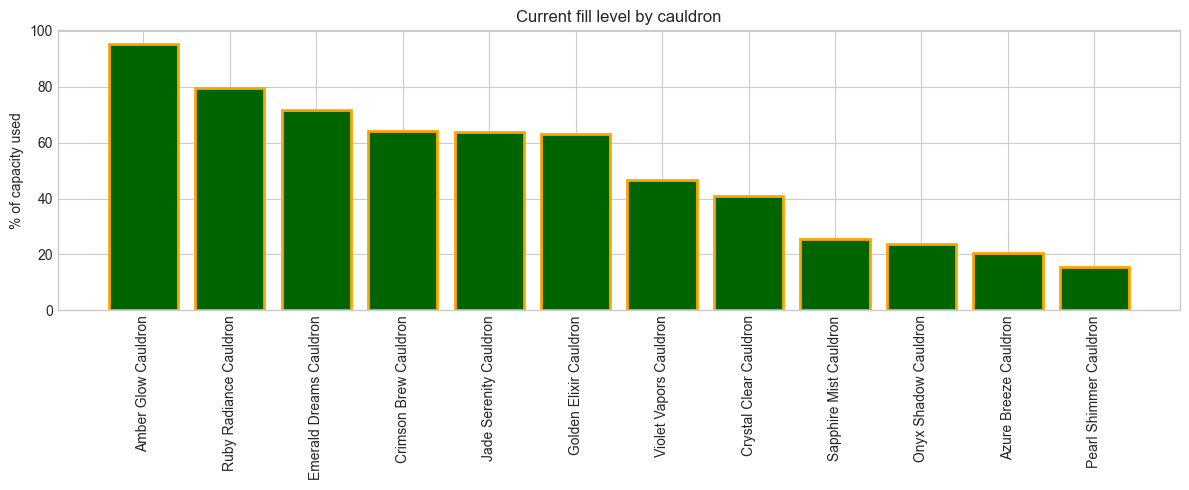

In [42]:
plt.figure(figsize=(12,5))
plt.bar(cauldrons["name"], cauldrons["fill_pct"], color="darkgreen", edgecolor="orange", linewidth=2 )
plt.xticks(rotation=90)
plt.ylabel("% of capacity used")
plt.title("Current fill level by cauldron")
plt.tight_layout()
plt.show()

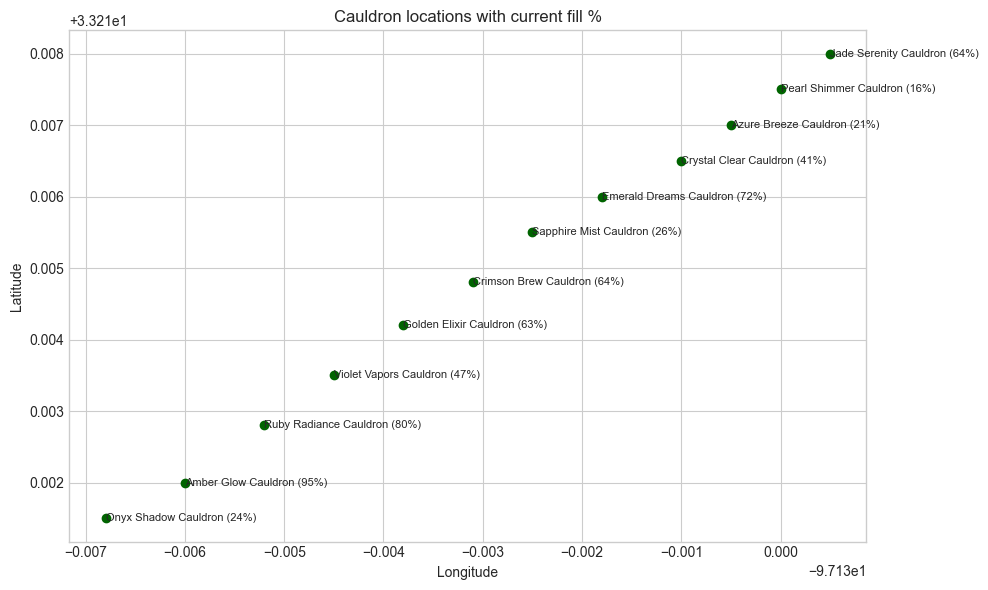

In [37]:
latest_map = cauldrons.dropna(subset=["latitude", "longitude"])

plt.figure(figsize=(10,6))
plt.scatter(latest_map["longitude"], latest_map["latitude"], color="darkgreen")

for _, row in latest_map.iterrows():
    label = f"{row['name']} ({row['fill_pct']:.0f}%)"
    plt.text(row["longitude"], row["latitude"], label, fontsize=8, va="center", ha="left")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Cauldron locations with current fill %")
plt.tight_layout()
plt.show()



In [75]:
print(cauldrons)

    max_volume            id                     name  latitude  longitude
0         1000  cauldron_001    Crimson Brew Cauldron   33.2148   -97.1331
1          800  cauldron_002   Sapphire Mist Cauldron   33.2155   -97.1325
2         1200  cauldron_003   Golden Elixir Cauldron   33.2142   -97.1338
3          750  cauldron_004  Emerald Dreams Cauldron   33.2160   -97.1318
4          900  cauldron_005   Violet Vapors Cauldron   33.2135   -97.1345
5          650  cauldron_006   Crystal Clear Cauldron   33.2165   -97.1310
6         1100  cauldron_007   Ruby Radiance Cauldron   33.2128   -97.1352
7          700  cauldron_008    Azure Breeze Cauldron   33.2170   -97.1305
8          950  cauldron_009      Amber Glow Cauldron   33.2120   -97.1360
9          850  cauldron_010   Pearl Shimmer Cauldron   33.2175   -97.1300
10        1050  cauldron_011     Onyx Shadow Cauldron   33.2115   -97.1368
11         600  cauldron_012   Jade Serenity Cauldron   33.2180   -97.1295


In [84]:
# 1) Ensure cauldron_id exists in cauldrons
if "cauldron_id" not in cauldrons.columns and "id" in cauldrons.columns:
    cauldrons = cauldrons.rename(columns={"id": "cauldron_id"})

# 2) Long format levels
data["timestamp"] = pd.to_datetime(data["timestamp"])
data["date"] = data["timestamp"].dt.date

level_cols = [c for c in data.columns if c not in ["timestamp", "date"]]

long = data.melt(
    id_vars=["timestamp", "date"],
    value_vars=level_cols,
    var_name="cauldron_id",
    value_name="volume"
)

# 3) Attach max_volume + name (now cauldron_id exists)
use_cols = [c for c in ["cauldron_id", "name", "max_volume"] if c in cauldrons.columns]

long = long.merge(
    cauldrons[use_cols],
    on="cauldron_id",
    how="left"
)

# 5. End-of-day volume & fill% per cauldron per date
level_day = (
    long.sort_values("timestamp")
        .groupby(["cauldron_id", "date"], as_index=False)
        .agg(
            end_volume=("volume", "last"),
            max_volume=("max_volume", "max"),
            name=("name", "last")
        )
)

level_day["fill_pct"] = (level_day["end_volume"] / level_day["max_volume"]) * 100

# 6. Tickets per day (amount_collected)
tickets["date"] = pd.to_datetime(tickets["date"]).dt.date

ticket_day = (
    tickets
    .groupby(["cauldron_id", "date"], as_index=False)
    .agg(ticket_volume=("amount_collected", "sum"))
)

# 7. Drains per day (use end_time, sum volume_lost)
drains["end_time"] = pd.to_datetime(drains["end_time"])
drains["date"] = drains["end_time"].dt.date

drain_day = (
    drains
    .groupby(["cauldron_id", "date"], as_index=False)
    .agg(drain_volume=("volume_lost", "sum"))
)

# 8. Build daily table
daily = (
    level_day
    .merge(ticket_day, on=["cauldron_id", "date"], how="left")
    .merge(drain_day, on=["cauldron_id", "date"], how="left")
)

daily[["ticket_volume", "drain_volume"]] = daily[["ticket_volume", "drain_volume"]].fillna(0)

print("daily columns:", daily.columns)
print(daily.head())

daily columns: Index(['cauldron_id', 'date', 'end_volume', 'max_volume', 'name', 'fill_pct',
       'ticket_volume', 'drain_volume'],
      dtype='object')
    cauldron_id        date  end_volume  max_volume                   name  \
0  cauldron_001  2025-10-30      338.47        1000  Crimson Brew Cauldron   
1  cauldron_001  2025-10-31      445.32        1000  Crimson Brew Cauldron   
2  cauldron_001  2025-11-01      465.35        1000  Crimson Brew Cauldron   
3  cauldron_001  2025-11-02      590.49        1000  Crimson Brew Cauldron   
4  cauldron_001  2025-11-03      614.14        1000  Crimson Brew Cauldron   

   fill_pct  ticket_volume  drain_volume  
0    33.847            0.0          0.40  
1    44.532            0.0          2.37  
2    46.535           95.8         83.82  
3    59.049            0.0          7.14  
4    61.414           95.8         88.19  


In [86]:
cols = [
    "cauldron_id",
    "name",
    "date",
    "end_volume",
    "max_volume",
    "fill_pct",
    "ticket_volume",
    "drain_volume"
]

pretty_daily = (
    daily[cols]
    .sort_values(["cauldron_id", "date"])
    .head(20)
    .style
    .format({
        "end_volume": "{:.2f}",
        "max_volume": "{:.0f}",
        "fill_pct": "{:.1f}%",
        "ticket_volume": "{:.2f}",
        "drain_volume": "{:.2f}",
    })
    .set_caption("Daily Cauldron Summary")
    .set_table_styles(
        [
            {
                "selector": "th",
                "props": [("background-color", "#1f2937"),
                          ("color", "white"),
                          ("padding", "6px")]
            },
            {
                "selector": "td",
                "props": [("padding", "4px")]
            }
        ]
    )
    .hide(axis="index")   # <- works on newer pandas; replaces hide_index()
)

pretty_daily


cauldron_id,name,date,end_volume,max_volume,fill_pct,ticket_volume,drain_volume
cauldron_001,Crimson Brew Cauldron,2025-10-30,338.47,1000,33.8%,0.00,0.40
cauldron_001,Crimson Brew Cauldron,2025-10-31,445.32,1000,44.5%,0.00,2.37
cauldron_001,Crimson Brew Cauldron,2025-11-01,465.35,1000,46.5%,95.80,83.82
cauldron_001,Crimson Brew Cauldron,2025-11-02,590.49,1000,59.0%,0.00,7.14
cauldron_001,Crimson Brew Cauldron,2025-11-03,614.14,1000,61.4%,95.80,88.19
cauldron_001,Crimson Brew Cauldron,2025-11-04,639.60,1000,64.0%,78.69,89.21
cauldron_001,Crimson Brew Cauldron,2025-11-05,648.97,1000,64.9%,95.80,94.56
cauldron_001,Crimson Brew Cauldron,2025-11-06,668.66,1000,66.9%,95.80,93.57
cauldron_001,Crimson Brew Cauldron,2025-11-07,510.20,1000,51.0%,191.60,236.55
cauldron_001,Crimson Brew Cauldron,2025-11-08,525.87,1000,52.6%,95.80,86.29


In [71]:
print(drains)

       cauldron_id                 start_time                   end_time  \
0     cauldron_001  2025-10-30 00:22:00+00:00  2025-10-30 00:22:00+00:00   
1     cauldron_001  2025-10-30 04:34:00+00:00  2025-10-30 04:34:00+00:00   
2     cauldron_001  2025-10-30 05:56:00+00:00  2025-10-30 05:56:00+00:00   
3     cauldron_001  2025-10-30 07:36:00+00:00  2025-10-30 07:36:00+00:00   
4     cauldron_001  2025-10-30 07:54:00+00:00  2025-10-30 07:54:00+00:00   
...            ...                        ...                        ...   
8750  cauldron_012  2025-11-09 23:13:00+00:00  2025-11-09 23:13:00+00:00   
8751  cauldron_012  2025-11-09 23:23:00+00:00  2025-11-09 23:23:00+00:00   
8752  cauldron_012  2025-11-09 23:25:00+00:00  2025-11-09 23:25:00+00:00   
8753  cauldron_012  2025-11-09 23:42:00+00:00  2025-11-09 23:42:00+00:00   
8754  cauldron_012  2025-11-09 23:50:00+00:00  2025-11-09 23:50:00+00:00   

      volume_lost  significant  
0             0.0        False  
1             0.0    

In [125]:
import matplotlib.pyplot as plt

def plot_cauldron_history(daily, cauldron_id):
    # Filter and sort
    df = daily[daily["cauldron_id"] == cauldron_id].sort_values("date")

    if df.empty:
        print("No data for", cauldron_id)
        return

    # Create figure with transparent background
    fig, ax1 = plt.subplots(figsize=(10, 5))
    fig.patch.set_alpha(0)          # no figure background
    ax1.set_facecolor("none")       # no axis background

    # === Bars: ticket (orange) & drain (green) ===
    x = range(len(df))

    ax1.bar(
        [i - 0.15 for i in x],
        df["ticket_volume"],
        width=0.3,
        label="Ticket volume",
        color="orange"
    )

    ax1.bar(
        [i + 0.15 for i in x],
        df["drain_volume"],
        width=0.3,
        label="Drain volume",
        color="green"
    )

    # === Line: fill % (yellow) on second axis ===
    ax2 = ax1.twinx()
    if "fill_pct" in df.columns:
        ax2.plot(
            x,
            df["fill_pct"],
            marker="o",
            color="red",
            label="Fill %",
            linewidth=2
        )
        ax2.set_ylim(0, 110)

    # === X ticks as dates ===
    ax1.set_xticks(x)
    ax1.set_xticklabels(df["date"].astype(str), rotation=45, ha="right")

    # === Axis titles, tick labels, and chart title in blue ===
    blue = "blue"

    ax1.set_xlabel("Date", color="black")
    ax1.set_ylabel("Volume (L)", color="black")
    ax2.set_ylabel("Fill %", color="black")

    ax1.tick_params(axis="x", colors="black")
    ax1.tick_params(axis="y", colors="black")
    ax2.tick_params(axis="y", colors="black")

    plt.title(f"Historic Potion Levels & Flows – {cauldron_id}", color="black")

    # === Legend ===
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

    plt.tight_layout()
    plt.show()


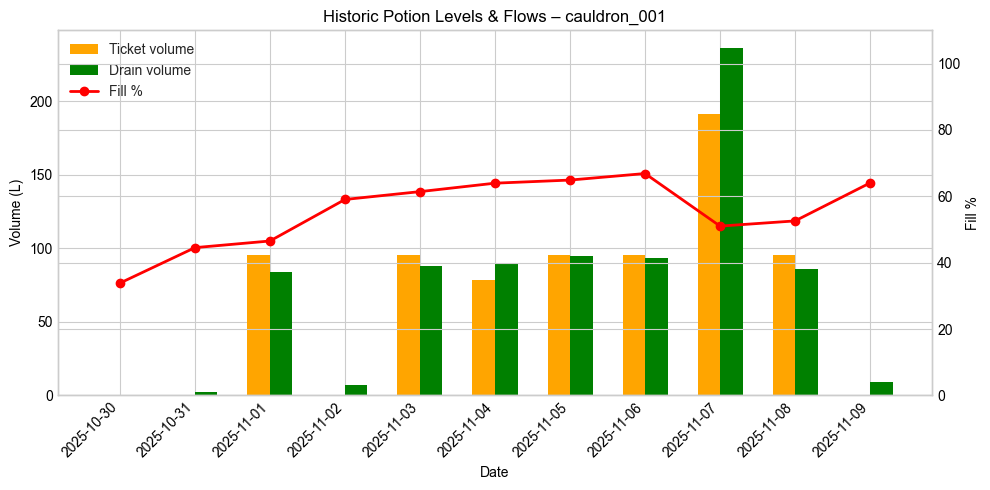

In [122]:
plot_cauldron_history(daily, "cauldron_001")


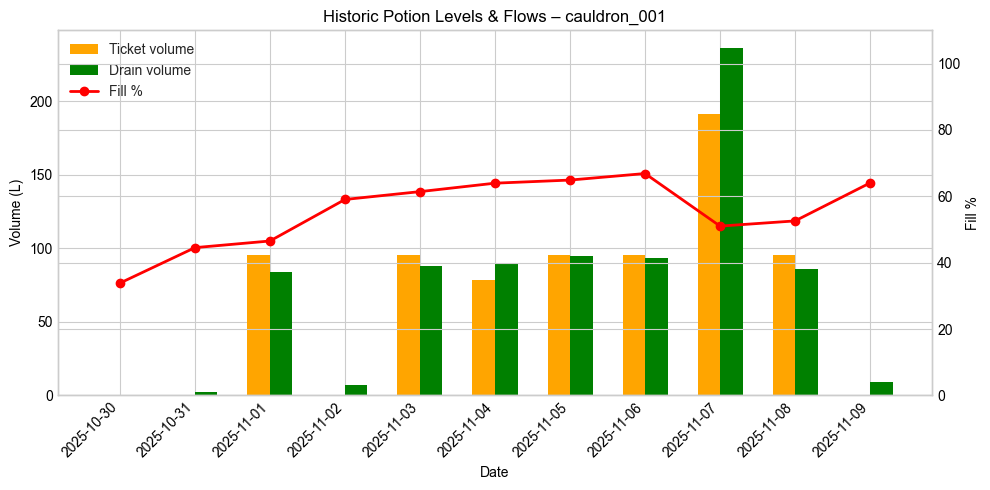

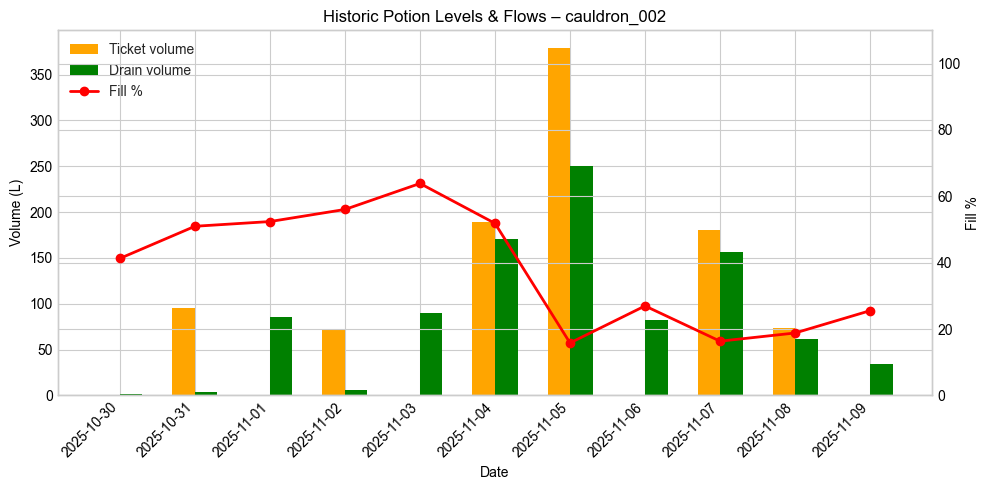

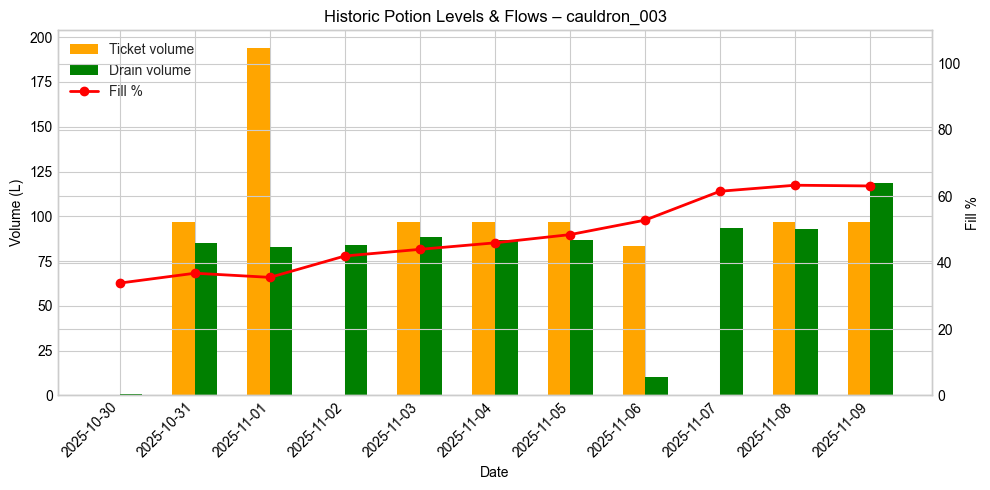

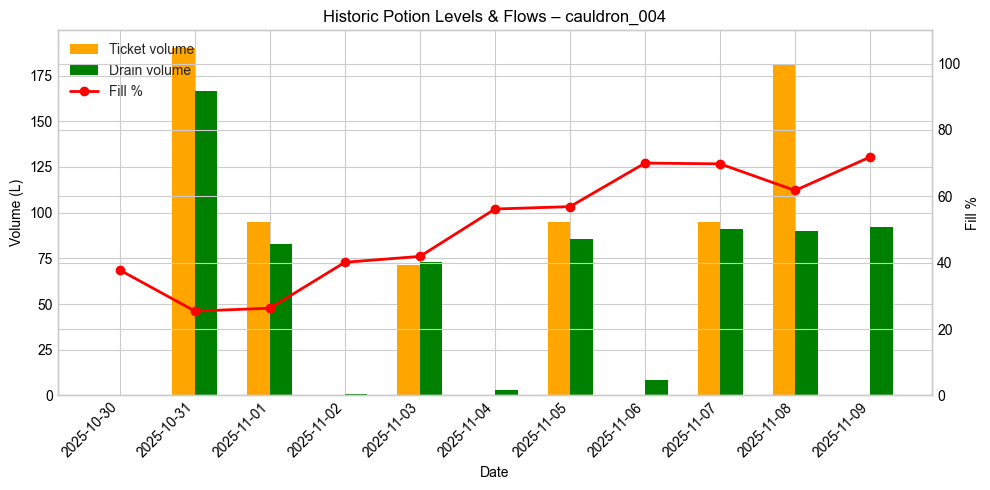

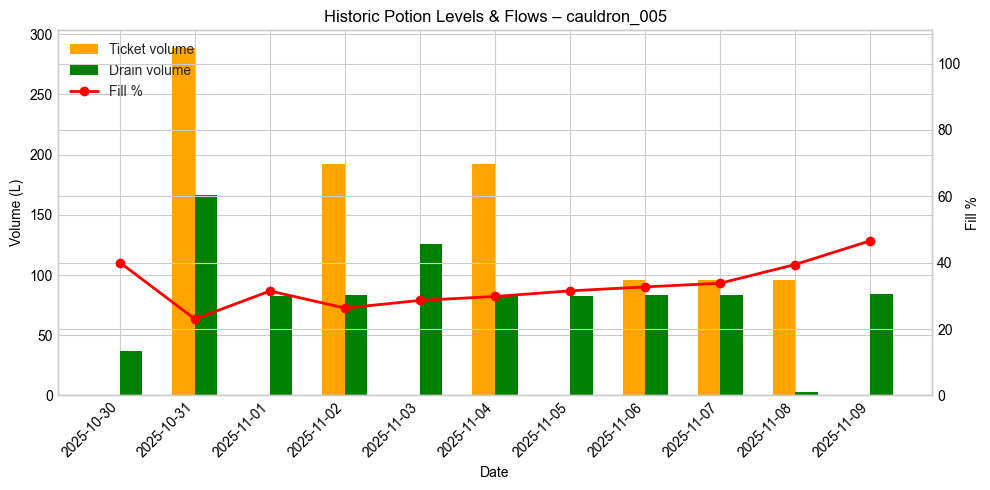

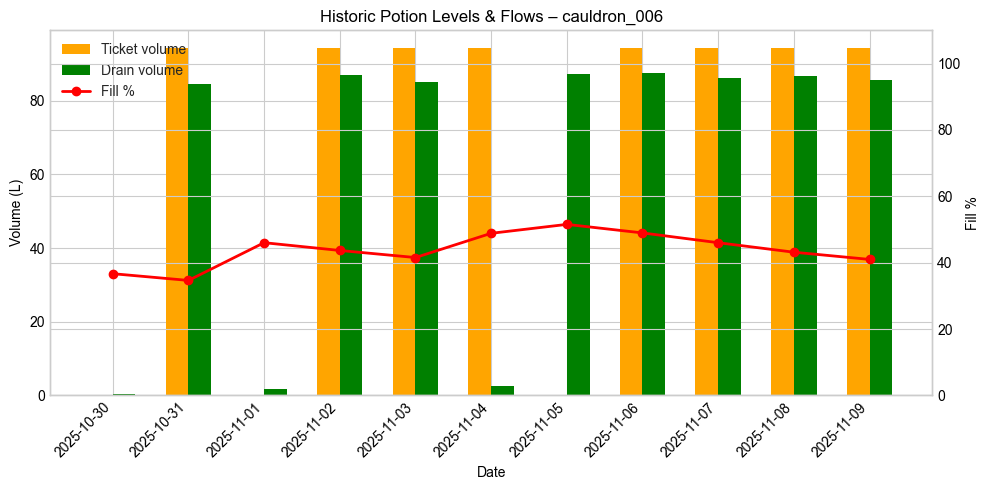

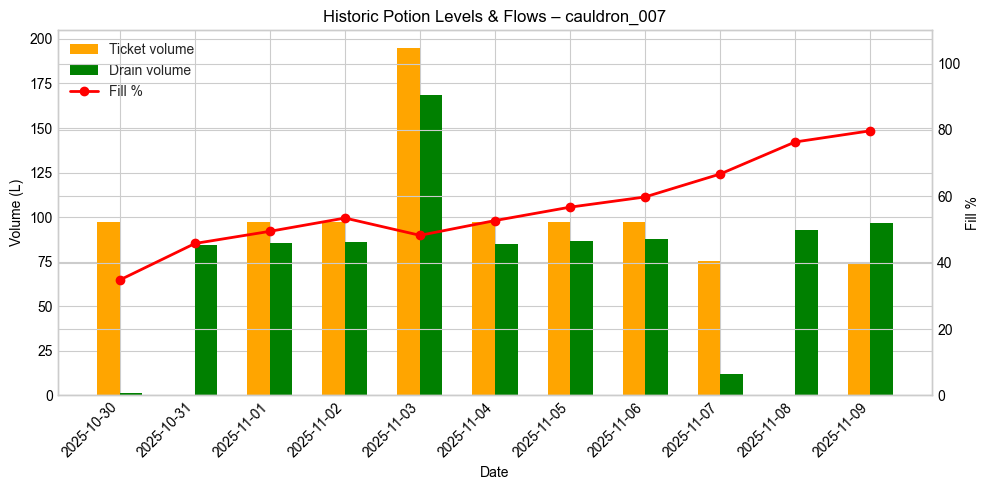

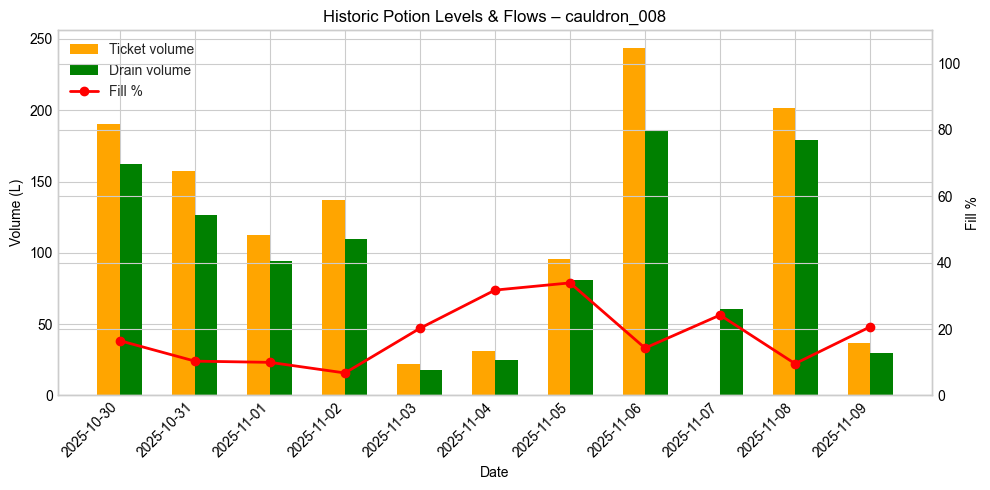

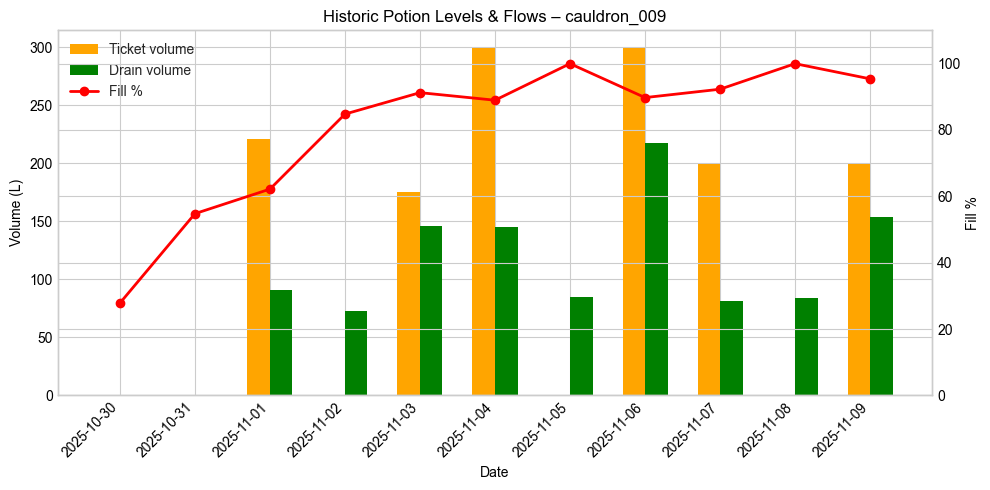

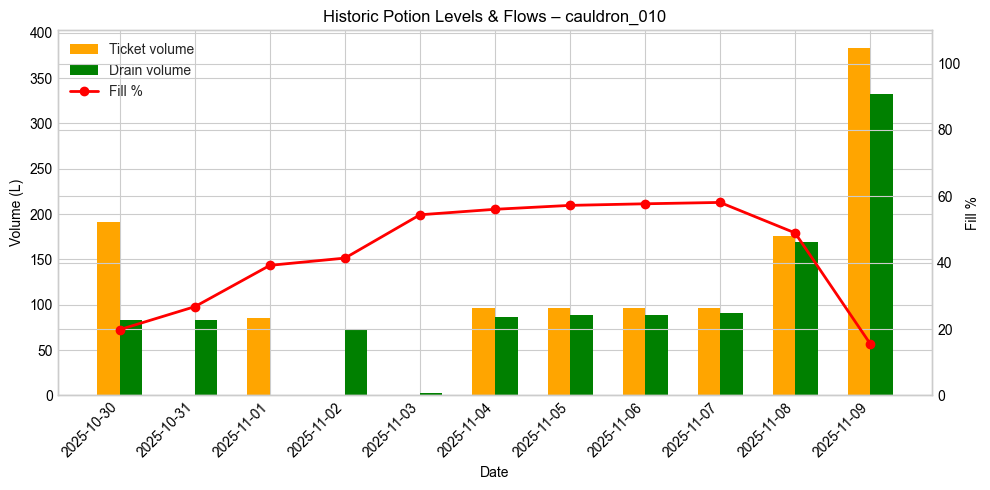

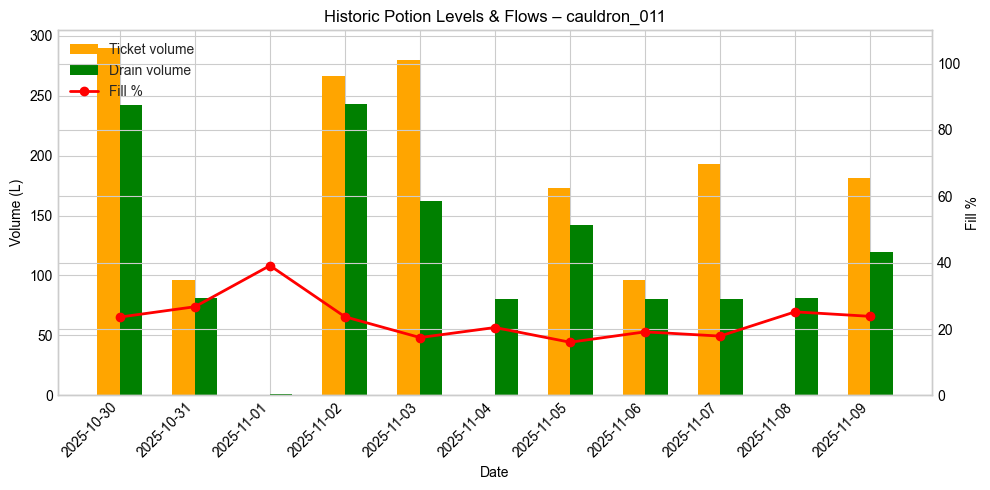

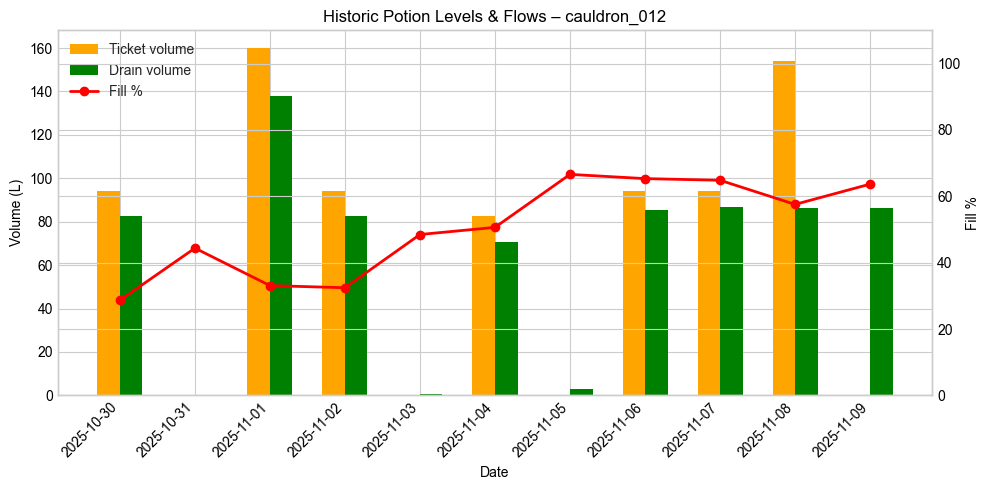

In [126]:
for cid in daily["cauldron_id"].unique():
    plot_cauldron_history(daily, cid)


In [144]:
# Avoid division by zero
daily["mismatch_pct"] = np.where(
    daily["max_volume"] > 0,
    (daily["mismatch_abs"] / daily["max_volume"]) * 100,
    np.nan
).round(1)

# Pivot: rows = cauldron, columns = date, values = mismatch %
heat = daily.pivot(
    index="cauldron_id",
    columns="date",
    values="mismatch_pct"
).sort_index()


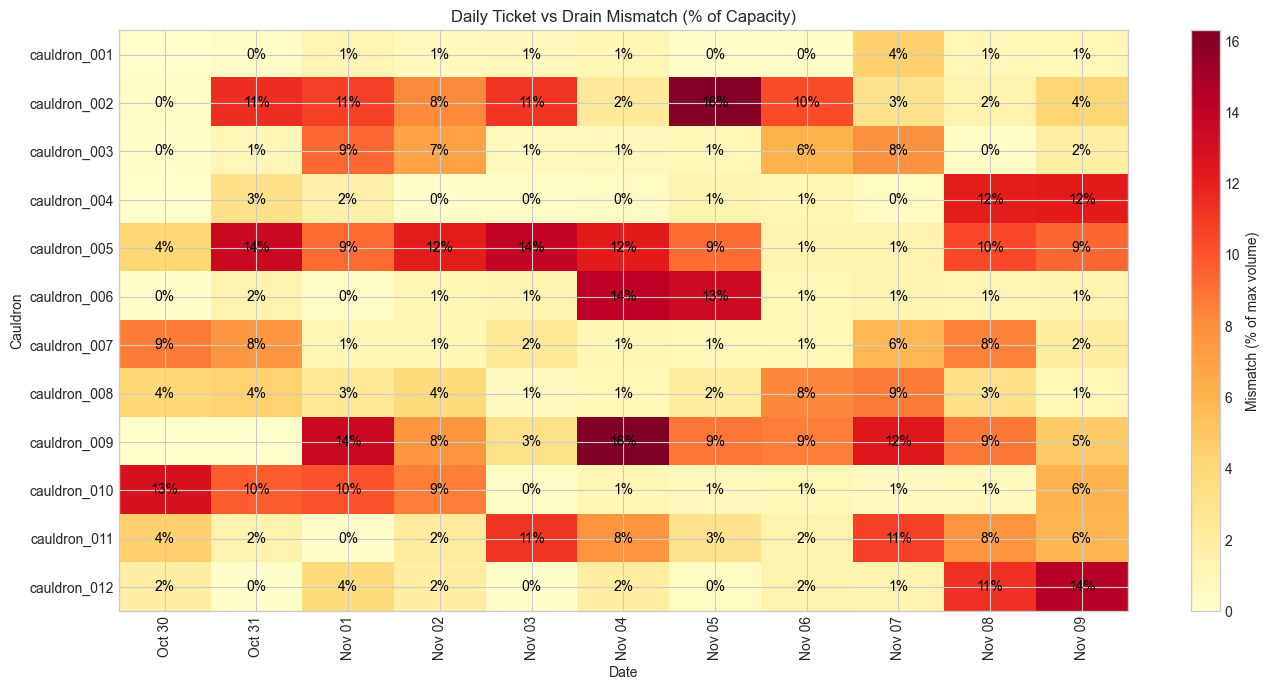

In [146]:
fig, ax = plt.subplots(figsize=(14, 7))

# Show heatmap
im = ax.imshow(
    heat.values,
    aspect="auto",
    cmap="YlOrRd",      # green→yellow→red style
    origin="upper",
    vmin=0,
    vmax=np.nanmax(heat.values) if not np.isnan(heat.values).all() else 1
)

# Axis labels & ticks
ax.set_yticks(range(len(heat.index)))
ax.set_yticklabels(heat.index)

ax.set_xticks(range(len(heat.columns)))
ax.set_xticklabels(
    [d.strftime("%b %d") for d in heat.columns],
    rotation=90,
    ha="center"
)

ax.set_xlabel("Date")
ax.set_ylabel("Cauldron")
ax.set_title("Daily Ticket vs Drain Mismatch (% of Capacity)")

# Add values as text inside cells (like cohort tables)
for i in range(heat.shape[0]):
    for j in range(heat.shape[1]):
        val = heat.iat[i, j]
        if not np.isnan(val) and val != 0:
            ax.text(
                j, i,
                f"{val:.0f}%",
                ha="center", va="center",
                fontsize=10,
                color="black"
            )

# Colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Mismatch (% of max volume)")

plt.tight_layout()
plt.show()


In [ ]:
print(drains.dtypes)
print(tickets.dtypes)

cauldron_id                 object
start_time                  object
end_time       datetime64[ns, UTC]
volume_lost                float64
significant                   bool
date                        object
dtype: object


In [148]:
suspicious_days = daily[daily["suspicious"]]
print(suspicious_days.head())


     cauldron_id       date  end_volume  max_volume                    name  \
2   cauldron_001 2025-11-01      465.35        1000   Crimson Brew Cauldron   
5   cauldron_001 2025-11-04      639.60        1000   Crimson Brew Cauldron   
8   cauldron_001 2025-11-07      510.20        1000   Crimson Brew Cauldron   
12  cauldron_002 2025-10-31      407.77         800  Sapphire Mist Cauldron   
13  cauldron_002 2025-11-01      419.14         800  Sapphire Mist Cauldron   

    fill_pct  ticket_volume  drain_volume  mismatch  mismatch_abs  suspicious  \
2   46.53500          95.80         83.82     11.98         11.98        True   
5   63.96000          78.69         89.21    -10.52         10.52        True   
8   51.02000         191.60        236.55    -44.95         44.95        True   
12  50.97125          94.82          3.77     91.05         91.05        True   
13  52.39250           0.00         85.59    -85.59         85.59        True   

    mismatch_pct  
2            1.2  


In [ ]:
#daily dynamic ticketing C part

def build_daily_summary(cauldrons, cauldron_data, tickets, drains,
                        mismatch_threshold=10):
    """
    Dynamic ticket-vs-drain matching, per cauldron per day.
    Re-run this whenever new data is pulled from the API.
    Returns a 'daily' DataFrame with mismatch + suspicious flag.
    """

    # ---------- 1. Prepare cauldrons ----------
    cauldrons = cauldrons.copy()
    if "id" in cauldrons.columns and "cauldron_id" not in cauldrons.columns:
        cauldrons = cauldrons.rename(columns={"id": "cauldron_id"})

    # kept only what we need
    cauldrons = cauldrons[["cauldron_id", "max_volume"]] \
        if "max_volume" in cauldrons.columns else cauldrons[["cauldron_id"]]

    # ---------- 2. Levels: last reading per day ----------
    levels = cauldron_data.copy()
    levels["timestamp"] = pd.to_datetime(levels["timestamp"])

    # wide -> long (timestamp, cauldron_id, volume)
    levels_long = levels.melt(
        id_vars="timestamp",
        var_name="cauldron_id",
        value_name="volume"
    )

    levels_long["date"] = levels_long["timestamp"].dt.date

    end_volume = (
        levels_long
        .sort_values("timestamp")
        .groupby(["cauldron_id", "date"])["volume"]
        .last()
        .reset_index(name="end_volume")
    )

    # ---------- 3. Tickets: sum per day ----------
    t = tickets.copy()
    t["date"] = pd.to_datetime(t["date"]).dt.date

    ticket_daily = (
        t.groupby(["cauldron_id", "date"])["amount_collected"]
        .sum()
        .reset_index(name="ticket_volume")
    )

    # ---------- 4. Drains: sum per day ----------
    d = drains.copy()
    d["start_time"] = pd.to_datetime(d["start_time"])
    d["date"] = d["start_time"].dt.date

    drain_daily = (
        d.groupby(["cauldron_id", "date"])["volume_lost"]
        .sum()
        .reset_index(name="drain_volume")
    )

    # ---------- 5. Combine to daily table ----------
    daily = (
        end_volume
        .merge(ticket_daily, on=["cauldron_id", "date"], how="left")
        .merge(drain_daily, on=["cauldron_id", "date"], how="left")
        .fillna({"ticket_volume": 0.0, "drain_volume": 0.0})
    )

    # attach capacity if available
    daily = daily.merge(cauldrons, on="cauldron_id", how="left")

    if "max_volume" in daily.columns:
        daily["fill_pct"] = (daily["end_volume"] / daily["max_volume"]) * 100

    # ---------- 6. Dynamic ticket matching logic ----------
    daily["mismatch"] = daily["ticket_volume"] - daily["drain_volume"]
    daily["mismatch_abs"] = daily["mismatch"].abs()

    # basic threshold rule
    suspicious = daily["mismatch_abs"] > mismatch_threshold

    # tickets but no drains
    suspicious |= (daily["ticket_volume"] > 0) & (daily["drain_volume"] == 0)

    # drains but no tickets
    suspicious |= (daily["ticket_volume"] == 0) & (daily["drain_volume"] > 0)

    daily["suspicious"] = suspicious

    return daily


In [151]:
cauldrons = pd.read_csv("cauldrons.csv")
cauldron_data = pd.read_csv("cauldron_data.csv")
tickets = pd.read_csv("tickets.csv")
drains = pd.read_csv("drain_events.csv")

daily = build_daily_summary(cauldrons, cauldron_data, tickets, drains,
                            mismatch_threshold=10)

print(daily.head())


    cauldron_id        date  end_volume  ticket_volume  drain_volume  \
0  cauldron_001  2025-10-30      338.47            0.0          0.40   
1  cauldron_001  2025-10-31      445.32            0.0          2.37   
2  cauldron_001  2025-11-01      465.35           95.8         83.89   
3  cauldron_001  2025-11-02      590.49            0.0          7.07   
4  cauldron_001  2025-11-03      614.14           95.8         88.29   

   max_volume  fill_pct  mismatch  mismatch_abs  suspicious  
0        1000    33.847     -0.40          0.40        True  
1        1000    44.532     -2.37          2.37        True  
2        1000    46.535     11.91         11.91        True  
3        1000    59.049     -7.07          7.07        True  
4        1000    61.414      7.51          7.51       False  


In [ ]:
#Global KPI metrics

# Title: Total Unaccounted Potion
total_unaccounted = daily["mismatch_abs"].sum()
print("Total Unaccounted Potion (L):", round(total_unaccounted, 2))


Total Unaccounted Potion (L): 1942.61


In [153]:
# Title:Suspicious Day Rate
#On what % of days does anything look wrong?
total_days = len(daily)
suspicious_days = int(daily["suspicious"].sum())
suspicious_day_rate = (suspicious_days / total_days * 100) if total_days else 0

print("Suspicious Days:", suspicious_days)
print("Suspicious Day Rate (%):", round(suspicious_day_rate, 1))


Suspicious Days: 95
Suspicious Day Rate (%): 72.0


In [155]:
worst = (
    per_cauldron
    .sort_values("total_abs_mismatch", ascending=False)
    .head(1)
)

if not worst.empty:
    worst_id = worst.iloc[0]["cauldron_id"]
    worst_vol = worst.iloc[0]["total_abs_mismatch"]
    print("Top Offending Cauldron:", worst_id)
    print("Unaccounted Volume (L):", round(worst_vol, 2))
else:
    print("Top Offending Cauldron: None")


Top Offending Cauldron: cauldron_009
Unaccounted Volume (L): 374.15
